___
# PROJETO 1

## <font color='red'>Patrick dos Santos Câmara</font>
___

## <font color='blue'>Previdência social do INSS é justo?</font>

## Introdução

Com as dificuldades na política e na economia que o Brasil enfrenta atualmente, é percepitível em jornais e notícias que os aposentados e os pensionistas são os grupos que mais sofrem. Sendo para se aposentar, aumentando cada vez mais o tempo de trabalho e idade; e o valor da aposentadoria, diminuindo cada vez mais, obrigando alguns aposentados procurar outra forma de reverter seu problema financeiro; para os pensionistas é a dificuldade e o valor da pensão que são baixas, fazendo procurar uma forma de trabalho. Para exemplificar esse meu argumento posso citar as seguintes notícias:

http://sindisprevrs.org.br/noticias/detalhe/id/1568-um-terco-dos-aposentados-brasileiros-continua-na-ativa
http://noticias.uol.com.br/politica/ultimas-noticias/2016/08/31/em-pronunciamento-a-tv-temer-defende-reformas-da-previdencia-e-trabalhista.htm
http://oglobo.globo.com/economia/reforma-da-previdencia-tera-exigencia-maior-de-anos-de-contribuicao-19849590

Como podemos perceber, atualmente a previdência social poderá ser reformulada, desse jeito pode ocorrer aumento do tempo de contribuição e a diminuição do valor da aposentadoria. No projeto, irei tentar explicar que fazendo isso só irá piorar o que já está acontecendo.




___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Patrick dos Santos\Desktop\CDEng-master\Projeto1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
dados = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
#pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

In [6]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [7]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [8]:
dados.columns = estrutura.Coluna

In [9]:
dados.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [10]:
#Definindo Variaveis
dados.trabalho = dados.V9001.astype('category')
dados.carteira = dados.V9045.astype('category')
dados.aposentados = dados.V9122.astype('category')
dados.pensionistas = dados.V9123.astype('category')
dados.UF = dados.UF.astype('category')
dados.Rendamensal = dados.V4719[dados.V4719 < 100000]
dados.Rendamensal = dados.Rendamensal.astype("float")
dados.valorpensão = dados.V1255[dados.V1255 < 100000]
dados.valorpensão = dados.valorpensão.astype("float")
dados.valoraposentadoria = dados.V1252[dados.V1252 < 100000]
dados.valoraposentadoria = dados.valoraposentadoria.astype("float")
dados.horastrabalho = dados.V4707.astype('category')
n=dados.shape[0]

Para começar a nossa comparação entre aposentados e pensionistas para concluir se eles estão sofrendo por conta da Previdência Social do INSS, primeiramente vamos fazer uma comparação geral. Ou seja, vamos verificar a taxa de aposentados e pensionistas em todo o Brasil, dividindo e várias categorias.

Aposentados:
Não Aposentados    75.3
Aposentados        10.7
dtype: float64 



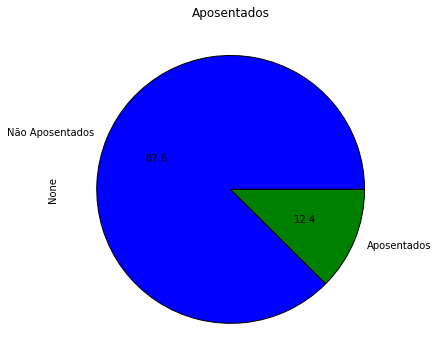

In [11]:
print('Aposentados:')
dados.aposentados.cat.categories = ('Aposentados', 'Não Aposentados')
ut1 = (dados.aposentados.value_counts()/n*100).round(decimals=1)
print(ut1,'\n')
plot = ut1.plot(kind='pie',title='Aposentados',autopct='%.1f',figsize=(6, 6))

Pensionistas:
Não Pensionistas    82.5
Pensionistas         3.5
dtype: float64 



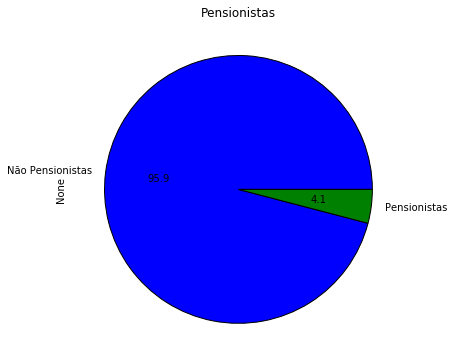

In [12]:
print('Pensionistas:')
dados.pensionistas.cat.categories = ('Pensionistas', 'Não Pensionistas')
ut2 = (dados.pensionistas.value_counts()/n*100).round(decimals=1)
print(ut2,'\n')
plot = ut2.plot(kind='pie',title='Pensionistas',autopct='%.1f',figsize=(6, 6))

Nesses dois últimos gráficos, podemos ver que a porcentagem no Brasil de Aposentados é maior do que os Pensionistas, desse jeito podemos concluir que os aposentados irão ter mais problemas caso seja reformulado a Previdência Social ois sua porcentagem é maior. Porém mesmo os Pensionistas tendo uma taxa maior, eles também sofreram.

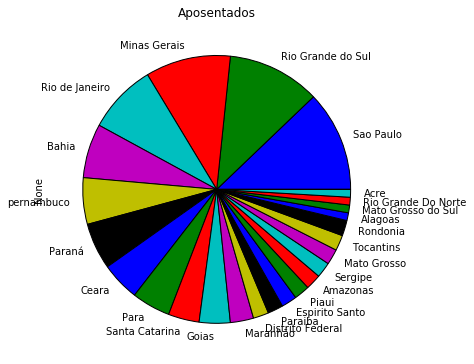

In [13]:
dados.UF.cat.categories = ('Rondonia','Acre','Amazonas','Roraima','Para','Amapa', 'Tocantins', 'Maranhão', 'Piaui','Ceara', 
                           'Rio Grande Do Norte', 'Paraiba', 'pernambuco','Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 
                           'Espirito Santo', 'Rio de Janeiro', 'Sao Paulo', 'Paraná', 'Santa Catarina','Rio Grande do Sul', 
                           'Mato Grosso do Sul', 'Mato Grosso', 'Goias', 'Distrito Federal')
ct=pd.crosstab(dados.UF,dados.aposentados,margins=True,rownames=['UF'], colnames=['Aposentados'])
ct
ut3 = (dados.UF[dados.aposentados == 'Aposentados'].value_counts()/n*100).round(decimals=1)
plot = ut3.plot(kind='pie',title='Aposentados',figsize=(6, 6))

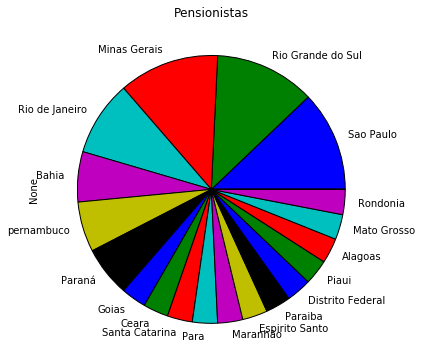

In [14]:
ct1=pd.crosstab(dados.UF,dados.pensionistas,margins=True,rownames=['UF'], colnames=['Aposentados'])
ct1
ut4 = (dados.UF[dados.pensionistas == 'Pensionistas'].value_counts()/n*100).round(decimals=1)
plot = ut4.plot(kind='pie',title='Pensionistas',figsize=(6, 6))

Nesses dois últimos gráficos, foi separado a porcentagem de Aposentados e Pensionistas em cada Estado, podemos perceber que ambas seguiram uma característica parecida que é uma maior taxa em estados mais populosos. Com esses gráficos, só podemos concluir em quais estados estão concentrados os aposentados e pensionistas.

In [15]:
dados["REGIAO"] = pd.Series(len(dados))
dados.REGIAO[dados.UF == "Rondonia"] = "Norte"
dados.REGIAO[dados.UF == "Acre"] = "Norte"
dados.REGIAO[dados.UF == "Amazonas"] = "Norte"
dados.REGIAO[dados.UF == "Amapa"] = "Norte"
dados.REGIAO[dados.UF == "Para"] = "Norte"
dados.REGIAO[dados.UF == "Tocantins"] = "Norte"
dados.REGIAO[dados.UF == "Roraima"] = "Norte"
dados.REGIAO[dados.UF == "Rio Grande do Sul"] = "Sul"
dados.REGIAO[dados.UF == "Paraná"] = "Sul"
dados.REGIAO[dados.UF == "Santa Catarina"] = "Sul"
dados.REGIAO[dados.UF == "Rio de Janeiro"] = "Sudeste"
dados.REGIAO[dados.UF == "Sao Paulo"] = "Sudeste"
dados.REGIAO[dados.UF == "Espirito Santo"] = "Sudeste"
dados.REGIAO[dados.UF == "Minas Gerais"] = "Sudeste"
dados.REGIAO[dados.UF == "Mato Grosso"] = "Centro-Oeste"
dados.REGIAO[dados.UF == "Mato Grosso do Sul"] = "Centro-Oeste"
dados.REGIAO[dados.UF == "Distrito Federal"] = "Centro-Oeste"
dados.REGIAO[dados.UF == "Goias"] = "Centro-Oeste"
dados.REGIAO[dados.UF == "Bahia"] = "Nordeste"
dados.REGIAO[dados.UF == "Ceara"] = "Nordeste"
dados.REGIAO[dados.UF == "pernambuco"] = "Nordeste"
dados.REGIAO[dados.UF == "Paraiba"] = "Nordeste"
dados.REGIAO[dados.UF == "Sergipe"] = "Nordeste"
dados.REGIAO[dados.UF == "Rio Grande do Norte"] = "Nordeste"
dados.REGIAO[dados.UF == "Maranhão"] = "Nordeste"
dados.REGIAO[dados.UF == "Piaui"] = "Nordeste"
dados.REGIAO[dados.UF == "Alagoas"] = "Nordeste"

C:\Users\Patrick dos Santos\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Patrick dos Santos\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Patrick dos Santos\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

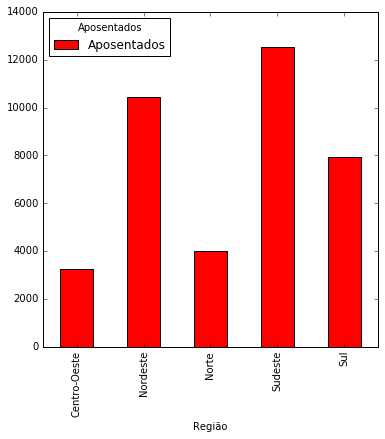

In [16]:
ct2=pd.crosstab(dados.REGIAO,dados.aposentados,margins=True,rownames=['Região'], colnames=['Aposentados'])
ct2
ct2cut=ct2.iloc[:5,:1]
ct2cut
ct2cut.plot.bar(color=('red'),stacked=False, figsize=(6,6))

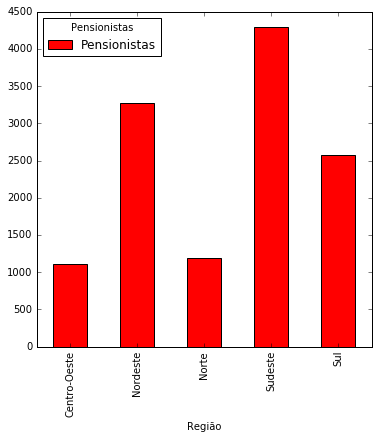

In [17]:
ct3=pd.crosstab(dados.REGIAO,dados.pensionistas,margins=True,rownames=['Região'], colnames=['Pensionistas'])
ct3
ct3cut=ct3.iloc[:5,:1]
ct3cut
ct3cut.plot.bar(color=('red'),stacked=False, figsize=(6,6))

Afim de comparar mais um pouco os Pensionistas e Aposentados, separei pelo número deles em cada região, porém a taxa é muito parecida, assim como os estados. Sendo assim, tirei a mesma conclusão desses gráficos com os gráficos anteriores a eles.

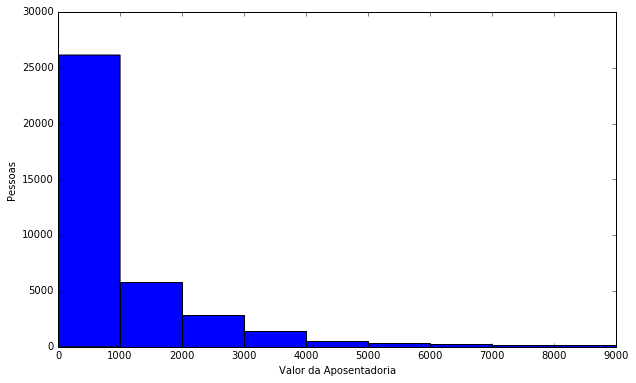

In [32]:
faixa1=arange(0,10000,1000)
variavelCateg=pd.cut(dados.valoraposentadoria,faixa1)
variavelCateg.value_counts()
plot1 = dados.valoraposentadoria.plot.hist(bins=faixa1, figsize=(10,6))
plt.ylabel("Pessoas")
plt.xlabel("Valor da Aposentadoria")
plt.show()

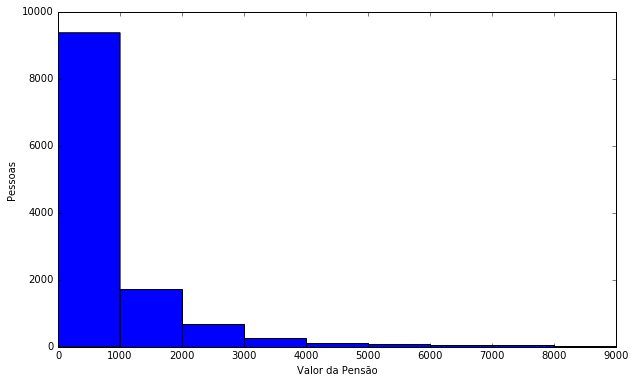

In [33]:
variavelCateg2=pd.cut(dados.valorpensão,faixa1)
variavelCateg2.value_counts()
plot2 = dados.valorpensão.plot.hist(bins=faixa1, figsize=(10,6))
plt.ylabel("Pessoas")
plt.xlabel("Valor da Pensão")
plt.show()

Agora eu comparei o valor que os Aposentados e Pensionistas recebem, e podemos concluir que ambos estão novamente com taxa parecidas, e também podemos perceber que esses valores estão na faixa de 0 a 1000 para maior parte dessas pessoas. Desse jeito, podemos concluir que a Previdência social de Aposentados e Pensionistas tem faixa de valores bem parecidas, e que a maior faixa de valor é de 0-1000, que é um valor relativamente baixo para as dispesas mensais.

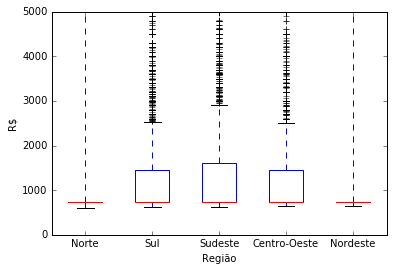

In [20]:
Valorap=pd.DataFrame([dados.valoraposentadoria[dados.REGIAO=="Norte"],dados.valoraposentadoria[dados.REGIAO=="Sul"],dados.valoraposentadoria[dados.REGIAO=="Sudeste"],
                    dados.valoraposentadoria[dados.REGIAO=="Centro-Oeste"],dados.valoraposentadoria[dados.REGIAO=="Nordeste"]], 
                   index= ["Norte","Sul","Sudeste","Centro-Oeste","Nordeste"])
plot = Valorap.T.plot.box()
plt.ylabel("R$")
plt.xlabel("Região")
plt.ylim(0,5000)
plt.show()


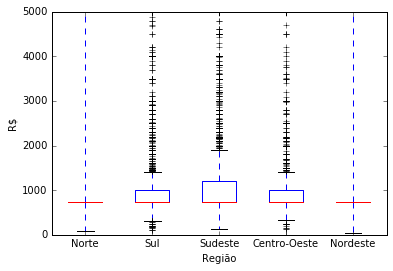

In [21]:
Valorpensio=pd.DataFrame([dados.valorpensão[dados.REGIAO=="Norte"],dados.valorpensão[dados.REGIAO=="Sul"],dados.valorpensão[dados.REGIAO=="Sudeste"],
                    dados.valorpensão[dados.REGIAO=="Centro-Oeste"],dados.valorpensão[dados.REGIAO=="Nordeste"]], 
                   index= ["Norte","Sul","Sudeste","Centro-Oeste","Nordeste"])
plot = Valorpensio.T.plot.box()
plt.ylabel("R$")
plt.xlabel("Região")
plt.ylim(0,5000)
plt.show()

Esses últimos box plots serviram para reafirmar o argumento anterior e além disso compara-los pelas regiões, a mediana em todas as regiões é bem parecida, porem nas regiões Sul e Sudeste podemos ver que seu valor chega a ser maior que as outras regiões. Além disso, esses boxplots só reforçam cada vez mais a igualdade dos aposentados e pensionistas.

Aposentados que trabalham:
Não trabalham    8.4
Trabalham        2.3
dtype: float64 



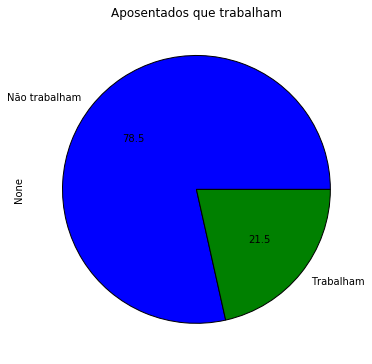

In [22]:
print('Aposentados que trabalham:')
dados.trabalho.cat.categories = ('Trabalham', 'Não trabalham')
ut5 = (dados.trabalho[dados.aposentados=="Aposentados"].value_counts()/n*100).round(decimals=1)
print(ut5,'\n')
plot = ut5.plot(kind='pie',title='Aposentados que trabalham',autopct='%.1f',figsize=(6, 6))

Pensionistas que trabalham:
Não trabalham    2.8
Trabalham        0.6
dtype: float64 



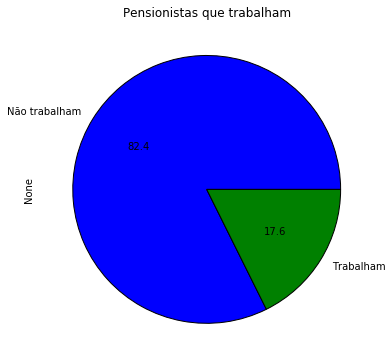

In [23]:
print('Pensionistas que trabalham:')
dados.trabalho.cat.categories = ('Trabalham', 'Não trabalham')
ut6 = (dados.trabalho[dados.pensionistas=="Pensionistas"].value_counts()/n*100).round(decimals=1)
print(ut6,'\n')
plot = ut6.plot(kind='pie',title='Pensionistas que trabalham',autopct='%.1f',figsize=(6, 6))

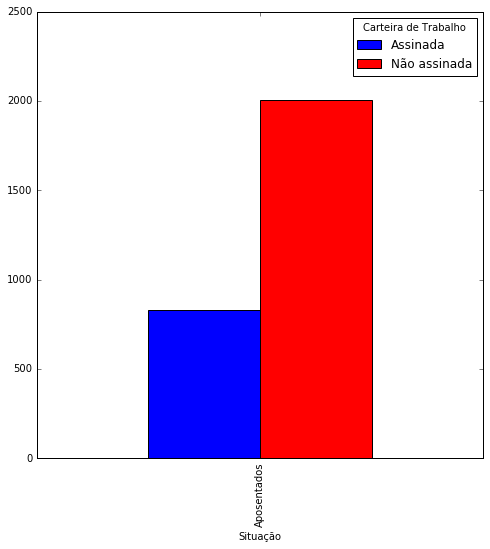

In [34]:
dados.carteira.cat.categories = ('Assinada', 'Não assinada')
ct03=pd.crosstab(dados.aposentados,dados.carteira,margins=True,rownames=['Situação'], colnames=['Carteira de Trabalho'])
ct03
ct03cut=ct03.iloc[:1,:2]
ct03cut
ct03cut.plot.bar(color=('blue','red'),stacked=False, figsize=(8,8))


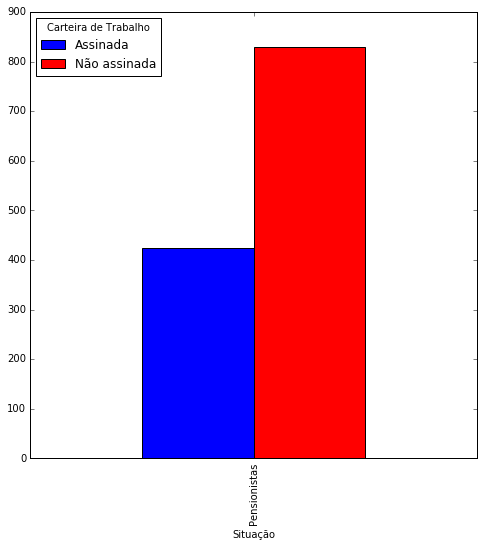

In [35]:
ct04=pd.crosstab(dados.pensionistas,dados.carteira,margins=True,rownames=['Situação'], colnames=['Carteira de Trabalho'])
ct04
ct04cut=ct04.iloc[:1,:2]
ct04cut
ct04cut.plot.bar(color=('blue','red'),stacked=False, figsize=(8,8))

Esses últimos 4 gráficos foram utilizados para comparar a taxa de Aposentados e pensionistas que exercem algum trabalho e, se exercer, verificar se é com carteira assinada ou não. Podemos concluir que existe ainda uma taxa considerável de aposentados e pensionistas que trabalham, isso ocorre para que eles gerem mais lucro pois a Previdência Social não os sustenta. E geralmente eles exercem trabalho sem carteira de trabalho assinada, para que não ocorra uma possivel quebra do auxilio que recebem.

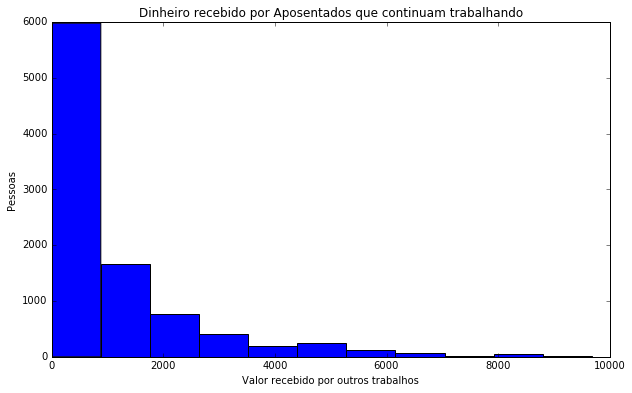

In [26]:
faixa2=arange(0,10000,880)
variavelCateg3=pd.cut(dados.Rendamensal[dados.aposentados=="Aposentados"],faixa2)
variavelCateg3.value_counts()
plot1 = dados.Rendamensal[dados.aposentados=="Aposentados"].plot.hist(bins=faixa1, figsize=(10,6))
plt.title("Dinheiro recebido por Aposentados que continuam trabalhando")
plt.ylabel("Pessoas")
plt.xlabel("Valor recebido por outros trabalhos")
plt.show()

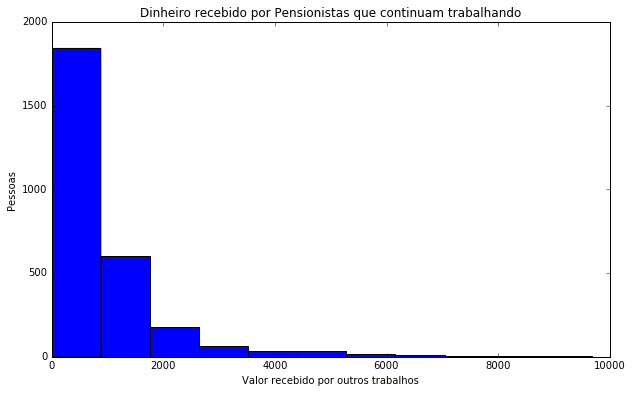

In [27]:
variavelCateg4=pd.cut(dados.Rendamensal[dados.pensionistas=="Pensionistas"],faixa2)
variavelCateg4.value_counts()
plot1 = dados.Rendamensal[dados.pensionistas=="Pensionistas"].plot.hist(bins=faixa1, figsize=(10,6))
plt.title("Dinheiro recebido por Pensionistas que continuam trabalhando")
plt.ylabel("Pessoas")
plt.xlabel("Valor recebido por outros trabalhos")
plt.show()

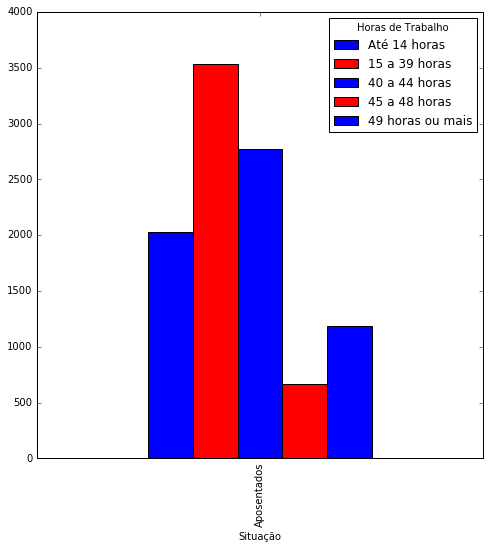

In [30]:
dados.horastrabalho.cat.categories = ('Até 14 horas', '15 a 39 horas', '40 a 44 horas', '45 a 48 horas', '49 horas ou mais')
ct05=pd.crosstab(dados.aposentados,dados.horastrabalho,margins=True,rownames=['Situação'], colnames=['Horas de Trabalho'])
ct05
ct05cut=ct05.iloc[:1,:5]
ct05cut
ct05cut.plot.bar(color=('blue','red'),stacked=False, figsize=(8,8))

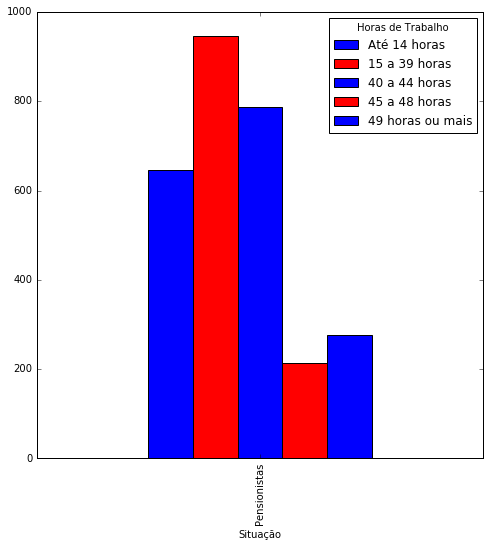

In [31]:
dados.horastrabalho.cat.categories = ('Até 14 horas', '15 a 39 horas', '40 a 44 horas', '45 a 48 horas', '49 horas ou mais')
ct06=pd.crosstab(dados.pensionistas,dados.horastrabalho,margins=True,rownames=['Situação'], colnames=['Horas de Trabalho'])
ct06
ct06cut=ct06.iloc[:1,:5]
ct06cut
ct06cut.plot.bar(color=('blue','red'),stacked=False, figsize=(8,8))

___
## Conclusão 

Foi comparado os pensionistas e aposentados nesse trabalho, a fim de verificar em qual deles a Previdência Social do INSS está sendo melhor em relação a outro, porem de acordo com as taxas e conclusões retiradas durante o desenvolvimento do trabalho, podemos concluir que ambos os grupos contem as mesmas características e taxas nas variaveis analisadas. Não tendo diferença na porcentagem deles no Brasil, em seus auxilios e em sua maneira de reverter os problemas com o INSS.

Além de concluirmos que os dois grupos contem características parecidas com as variavéis usadas, podemos dizer que a Providencia Social não está sendo usada de forma correta, não está suprindo as necessidades desses grupos. E que eles recorrem a outra maneira de suprir isso, assim ,procurando trabalhar mais. 